**Imports**

In [80]:
 # PIL: Python image library
from PIL import Image
# numpy: standard python library for numbers/math functions 
import numpy as np
# pandas: lets us use dataframes to work with data (excel spreadsheet as code object)
import pandas as pd

**Global Variables**

In [81]:
threshold = 80
lithothrix_actual = 221644

**Function Definitions**

In [82]:
# choose_black_or_white: Lambda function for deciding whether to change a 
# pixel to white or black
choose_black_or_white = lambda x: 255 if x < threshold else 0

# count_bw_pixels: Takes in a converted to black/white PIL image object and 
# either black or white. Counts and returns the number of pixels of 
# the given color in the image.
def count_bw_pixels(img, color):
    array_img = np.array(img)
    count = 0
    # Set which color to search for
    check = True
    if color == 'black':
        check = False
    # Loop through each row and its values in the array. If the value
    # matches the color we want, increase count 
    for row in array_img:
        for val in row:
            if val == check:
                count = count + 1
    return count

# Given measured and actual values, returns percent error
def calc_perc_error(measured, actual):
    return round((measured - actual) / actual * 100, 3)

**Main Code**

In [83]:
# Load Image as Object
img = Image.open('./cropped_photos/Lithothrix.aspergillum_SC_P_SA_8Mar2024_3_cropped.jpg')
# img = Image.open('./black-white_photos/BW - Lithothrix.aspergillum_SC_P_SA_8Mar2024_3.jpg')

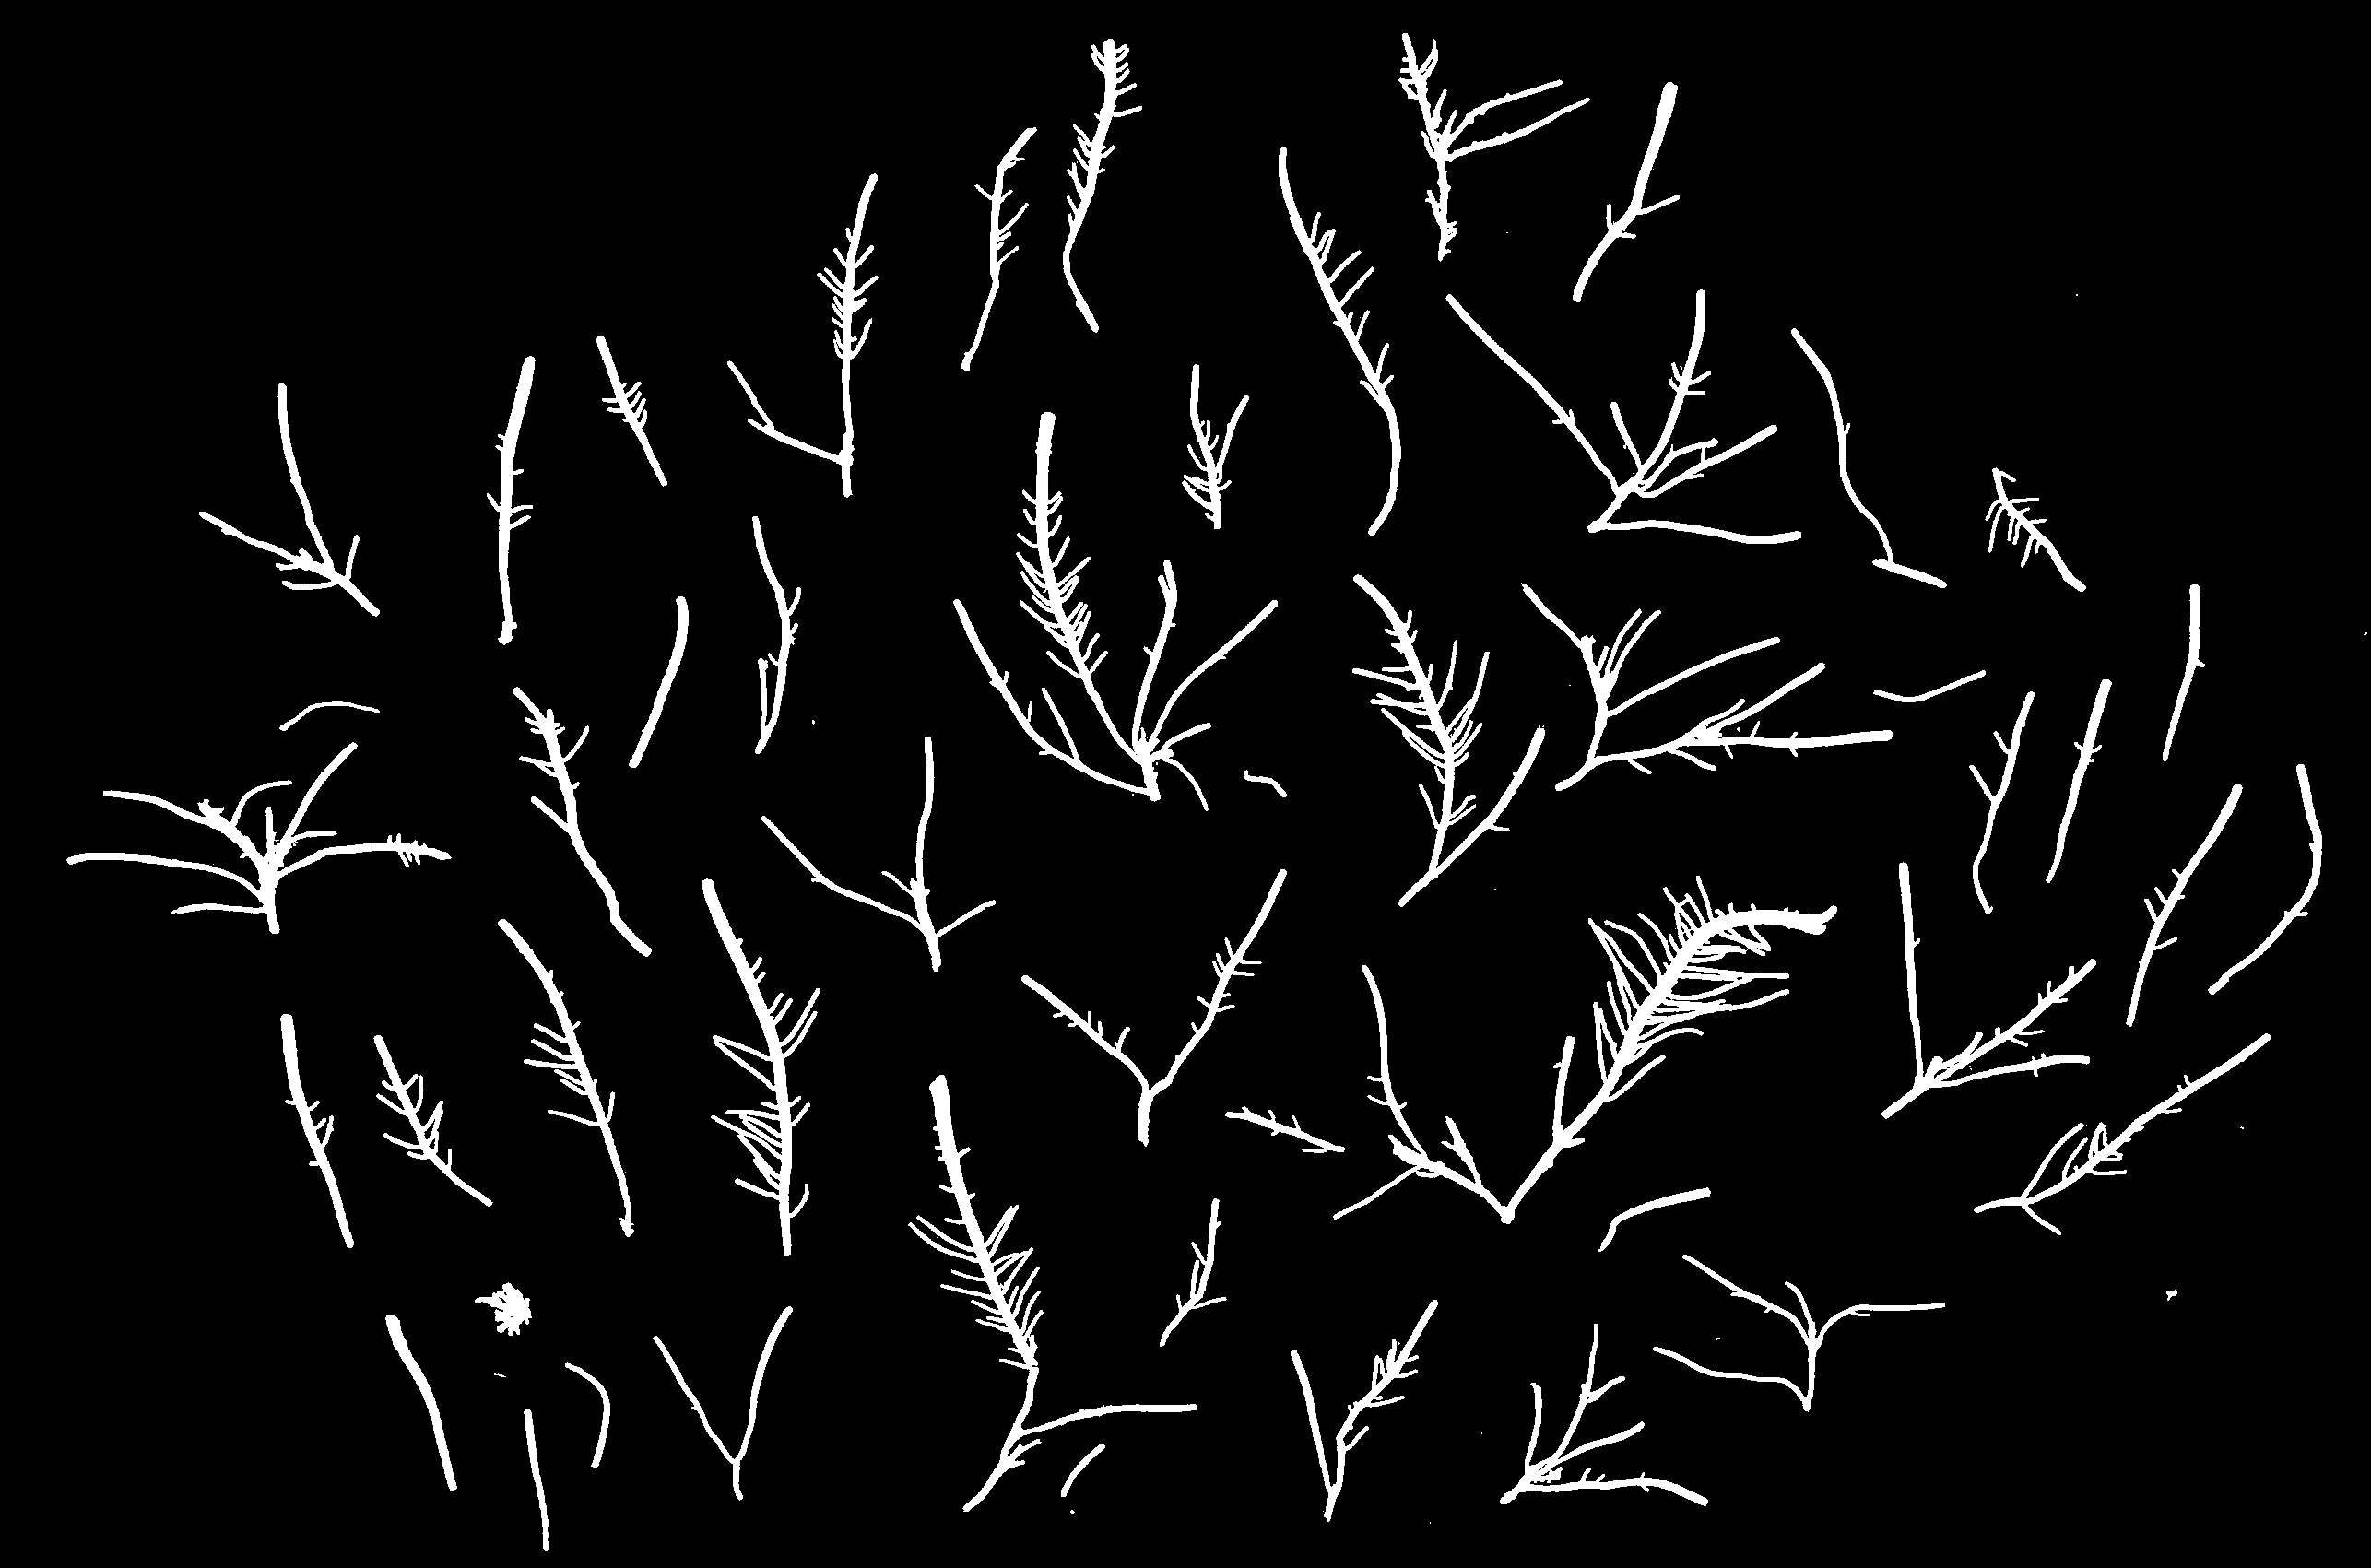

In [84]:
# Convert Image to Black-White
# figure out what this actually does
bw_img = img.convert('L').point(choose_black_or_white, mode='1')
# Display image
display(bw_img)

In [73]:
# Count number of white pixels in black/white image
flagged_pixels = count_bw_pixels(bw_img, 'white', threshold)
print("Flagged Pixels:", flagged_pixels)

Flagged Pixels: 242731


In [76]:
# Calculate percent error
print("Percent Error:", calc_perc_error(flagged_pixels, lithothrix_actual))

Percent Error: 9.51


**Full Loop of Testing Threshold Values**

In [102]:
# Create list of available thresholds 0-255
thresholds = list(range(0, 256))
performance_dict = {'Threshold': thresholds, 'Pixels': [], 'Percent_Error': []}

# Convert to black/white using threshold
for cur_thresh in thresholds:
    bw_img = img.convert('L').point(lambda x: 255 if x < cur_thresh else 0, mode='1')
    pix = count_bw_pixels(bw_img, 'white')
    performance_dict['Pixels'].append(pix)
    performance_dict['Percent_Error'].append(calc_perc_error(pix, lithothrix_actual))

In [103]:
# Dataframe manipulations
performance_df = pd.DataFrame.from_dict(performance_dict)
print(performance_df)

     Threshold   Pixels  Percent_Error
0            0        0       -100.000
1            1     1817        -99.180
2            2    15361        -93.070
3            3    29599        -86.646
4            4    43561        -80.346
..         ...      ...            ...
251        251  4374972       1873.873
252        252  4374972       1873.873
253        253  4374972       1873.873
254        254  4374972       1873.873
255        255  4374972       1873.873

[256 rows x 3 columns]
